# 👨‍⚕️ Predicting Mental Health Illness using Machine Learning 👨‍⚕️
This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of mental health illness prediction or classification.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.

## What we'll end up with

Since we already have a dataset, we'll approach the problem by keeping the following topics in our mind.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person needs treatment for mental health illness based on a number of different parameters at a considerable accuracy. 

We'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they need mental health treatment or not.

In a statement,

> Given clinical parameters about a person, can we predict whether they need mental health treatment or not ?

## 2. Data

What we want to do here is dive into the data our problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

Howevever, we've downloaded this dataset in a formatted way from [Kaggle](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey).

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a different attributes related to person's daily life and day to day work and the dependent variable is whether or not they need mental health treatment.


## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 90% accuracy at predicting whether or not a person need mental health treatment during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, we will start finding out what we can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Mental Health In Tech Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (need mental health treatment or not).

1. Timestamp

2. Age

3. Gender

4. Country

5. state: If you live in the United States, which state or territory do you live in?

6. self_employed: Are you self-employed?

7. family_history: Do you have a family history of mental illness?

8. treatment: Have you sought treatment for a mental health condition?

9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

10. no_employees: How many employees does your company or organization have?

11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?

12. tech_company: Is your employer primarily a tech company/organization?

13. benefits: Does your employer provide mental health benefits?

14. care_options: Do you know the options for mental health care your employer provides?

15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

18. leave: How easy is it for you to take medical leave for a mental health condition?

19. mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

20. physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?

22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

23. mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

24. physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

25. mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

27. comments: Any additional notes or comments

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk.

The libraries we use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [363]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file.

In [364]:
df = pd.read_csv("../data/survey.csv")
original_df = df.copy()
df.shape # (rows, columns)

(1259, 27)

## Data Exploration (exploratory data analysis or EDA)

Once we have imported a dataset, the next step is to explore. There's no set way of doing this. But what we would be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to our **data dictionary** and remind ourself of what different columns mean.

Our goal is to become a subject matter expert on the dataset we are working with. So if someone asks us a question about it, we can give them an explanation and when we start building models, we can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list we would want to walk through:

1. What question(s) are we trying to solve (or prove wrong)?
2. What kind of data do we have and how do we treat different types?
3. What’s missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.


In [365]:
# Let's check the top 5 rows of our dataframe
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [366]:
# And the top 10
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [367]:
# Let's see how many positive (YES) and negative (NO) samples we have in our dataframe
df.treatment.value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

Since these two values are close to even, our `target` column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of our target classes have the same number of samples.

If we would prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [368]:
# Normalized value counts
df.treatment.value_counts(normalize=True)

Yes    0.505957
No     0.494043
Name: treatment, dtype: float64

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

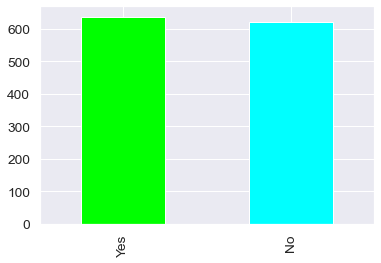

In [369]:
# Plot the value counts with a bar graph
df.treatment.value_counts().plot(kind="bar", color=["lime", "cyan"]);

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Data cleaning

In [371]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.

df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)

df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [372]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### Cleaning NaN

In [373]:
# Assign default values for each data type
default_int = 0
default_string = 'NaN'

df_int =  df.select_dtypes(include='int64')
df_categorical = df.select_dtypes(include='object')

int_features = df_int.columns.tolist()
string_features = df_categorical.columns.tolist()

In [374]:
int_features

['Age']

In [375]:
string_features

['Gender',
 'Country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [376]:
# Clean the NaN's
for feature in df:
    if feature in int_features:
        df[feature] = df[feature].fillna(default_int)
    elif feature in string_features:
        df[feature] = df[feature].fillna(default_string)


In [377]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [378]:
gender = df['Gender'].unique()
gender

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [379]:
#lower case all columm's elements
gender = df['Gender'].str.lower().unique()
gender

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [380]:
#clean 'Gender'

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)
        
        
#Get rid of unwanted stuff
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [381]:
#complete missing age with mean
df['Age'].fillna(df['Age'].median(), inplace = True)

In [382]:
# Remove Outliers from Age Column
df = df[(df.Age<100) & (df.Age>0)]

In [383]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([default_string], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [384]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

df['work_interfere'] = df['work_interfere'].replace([default_string], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [385]:
original_df = df.copy()

## Encoding Data

In [386]:
#Get rid of 'Country'
df = df.drop(['Country'], axis= 1)

#Encoding data
labelDict = {}
encode_dict = {}
for feature in df:
    if(feature=='treatment' or feature=='Age'): continue;
    le = LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    encode_dict[feature] = {}
    for cat in le.classes_:
        encode_dict[feature][cat] = int(le.transform([cat])[0])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_mental_health_interview ['Maybe', 'No', 'Yes']
label_phys_health_interview ['Maybe', 'No', 'Yes']
label_mental_vs_physical ["Don't 

In [387]:
encode_dict

{'Gender': {'female': 0, 'male': 1, 'trans': 2},
 'self_employed': {'No': 0, 'Yes': 1},
 'family_history': {'No': 0, 'Yes': 1},
 'work_interfere': {"Don't know": 0,
  'Never': 1,
  'Often': 2,
  'Rarely': 3,
  'Sometimes': 4},
 'no_employees': {'1-5': 0,
  '100-500': 1,
  '26-100': 2,
  '500-1000': 3,
  '6-25': 4,
  'More than 1000': 5},
 'remote_work': {'No': 0, 'Yes': 1},
 'tech_company': {'No': 0, 'Yes': 1},
 'benefits': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'care_options': {'No': 0, 'Not sure': 1, 'Yes': 2},
 'wellness_program': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'seek_help': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'anonymity': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'leave': {"Don't know": 0,
  'Somewhat difficult': 1,
  'Somewhat easy': 2,
  'Very difficult': 3,
  'Very easy': 4},
 'mental_health_consequence': {'Maybe': 0, 'No': 1, 'Yes': 2},
 'phys_health_consequence': {'Maybe': 0, 'No': 1, 'Yes': 2},
 'coworkers': {'No': 0, 'Some of them': 1, 'Yes': 2},
 'supervisor': {'No':

In [388]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,Yes,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,No,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,No,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,Yes,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,No,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


In [389]:
for (row, col) in df.iterrows():

    if str.lower(col.treatment) == 'yes':
        df['treatment'].replace(to_replace=col.treatment, value=1, inplace=True)
    else:
        df['treatment'].replace(to_replace=col.treatment, value=0, inplace=True)

In [390]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


## Checking For Missing Values

In [391]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
# missing_data

,Total,Percent
obs_consequence,0,0.0
care_options,0,0.0
Gender,0,0.0
self_employed,0,0.0
family_history,0,0.0
treatment,0,0.0
work_interfere,0,0.0
no_employees,0,0.0
remote_work,0,0.0
tech_company,0,0.0


## Correlation Matrix

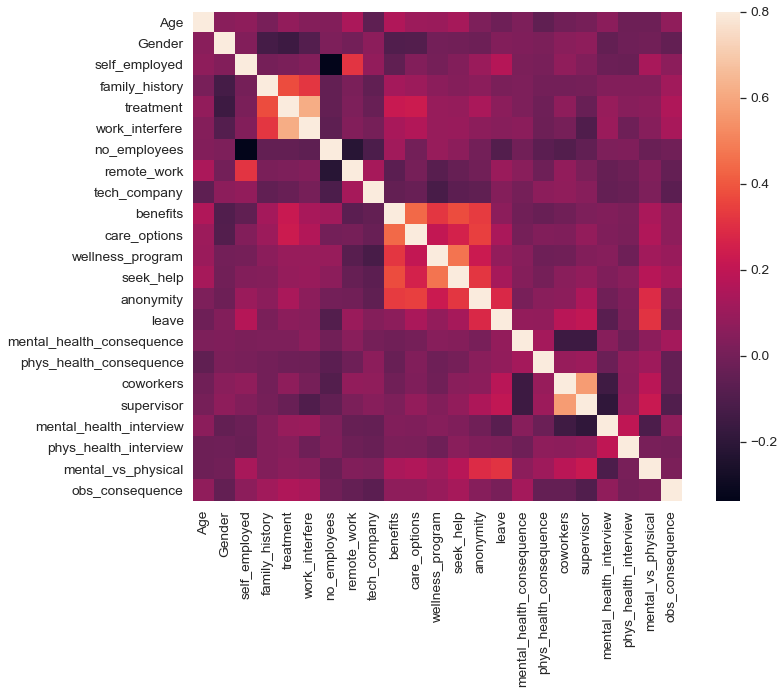

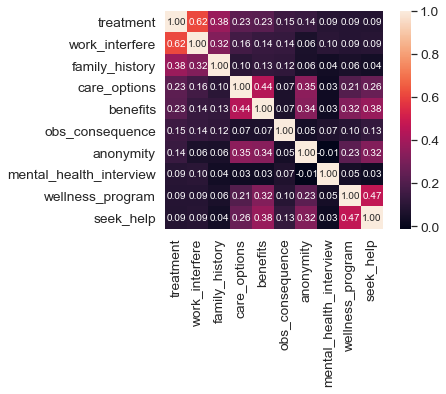

In [392]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [393]:
df.describe()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,...,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,32.038308,0.817239,0.114126,0.390263,0.504389,2.288907,2.787709,0.296887,0.819633,1.051875,...,0.646449,1.407821,0.849960,0.828412,0.972067,1.098164,0.867518,0.715882,0.814046,0.144453
std,7.346630,0.422176,0.318091,0.488004,0.500180,1.596075,1.737468,0.457069,0.384646,0.837246,...,0.908065,1.506801,0.766612,0.484676,0.619197,0.843565,0.424874,0.723219,0.834401,0.351689
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,72.000000,2.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


### Mental Health Treatment Frequency according to Gender

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the gender column. 

In [394]:
original_df.Gender.value_counts()

male      988
female    247
trans      18
Name: Gender, dtype: int64

In [395]:
# Compare target column with Gender column
pd.crosstab(df.treatment, df.Gender)

Gender,0,1,2
treatment,,,
0,77,540,4
1,170,448,14


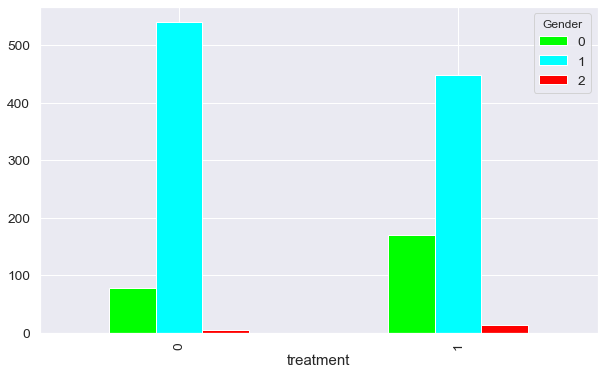

In [396]:
# Create a plot
pd.crosstab(df.treatment, df.Gender).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["lime", "cyan","red"]);

### Density Distribution by Age

Text(0.5, 0, 'Age')

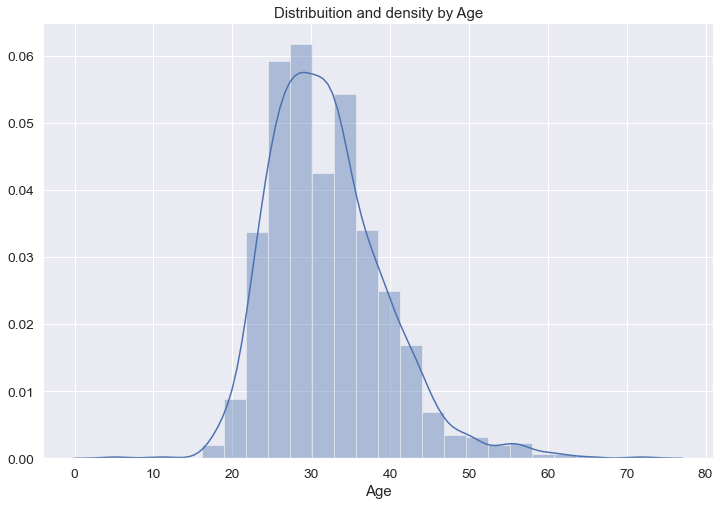

In [397]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

C:\Users\satish\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


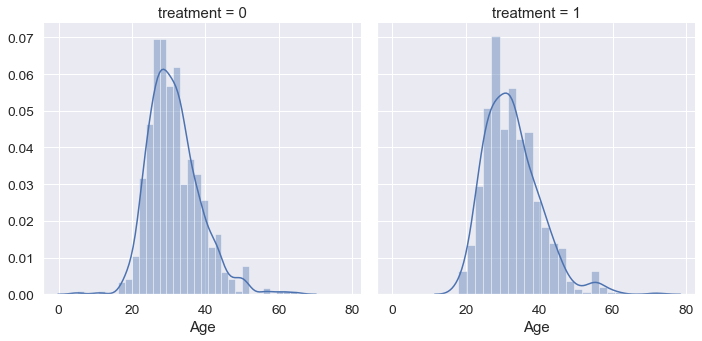

In [398]:
# Separate by treatment or not

g = sns.FacetGrid(df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

## Scaling and fitting
Features Scaling We're going to scale age, because is extremely different from the othere ones.

In [399]:
# Scaling Age
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.477612,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,0.582090,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.402985,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,0.388060,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,0.388060,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


## 5. Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the independent variables.

Remember our problem?

> Given clinical parameters about a person, can we predict whether they need mental health treatment or not ?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 90% accuracy at predicting whether or not a person need mental health treatment during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [400]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.477612,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,0.582090,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.402985,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,0.388060,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,0.388060,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [401]:
# Everything except target variable
X = df.drop("treatment", axis=1)

# Target variable
y = df.treatment.values

In [402]:
# Independent variables (no target column)
X.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.477612,0,0,0,2,4,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,0.582090,1,0,0,3,5,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.402985,1,0,0,3,4,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,0.388060,1,0,1,2,2,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,0.388060,1,0,0,1,1,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


In [403]:
# Targets
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into any organization and start using it on people. How would you know how well your model goes on a new person not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [404]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).

But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [405]:
X_train.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
200,0.328358,0,0,1,4,2,0,1,2,0,...,0,4,1,1,1,1,1,1,2,0
537,0.313433,1,0,1,1,5,0,1,0,0,...,0,0,0,1,0,0,1,1,1,0
1159,0.686567,1,0,0,1,5,1,1,0,0,...,0,0,2,1,0,0,1,1,1,0
378,0.432836,0,0,1,3,5,0,0,2,2,...,2,3,0,0,1,1,1,1,2,0
1228,0.298507,1,0,1,4,2,0,1,0,2,...,0,2,2,1,1,1,1,0,0,0


In [406]:
y_train, len(y_train)

(array([1, 1, 0, ..., 1, 1, 1], dtype=int64), 1002)

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Why these?

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [407]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [408]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.7689243027888446,
 'Logistic Regression': 0.8047808764940239,
 'Random Forest': 0.8286852589641435}

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

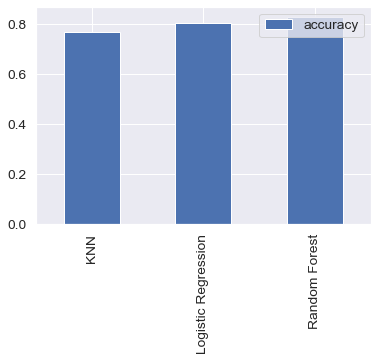

In [409]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we have got our baseline model and we know a model's first predictions aren't always what we should  based our next steps off.

Let's look at the following

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning and cross-validation

You can use the same algorithms but change the settings (hyperparameters) and get different results.

You change the settings and it works so well, it **overfits** (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

The most common type of cross-validation is *k-fold*. It involves splitting your data into *k-fold's* and then testing a model on each.

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

Here's the plan:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

For now, let's try a few different values of `n_neighbors`.

In [410]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [411]:
train_scores

[1.0,
 0.8353293413173652,
 0.8642714570858283,
 0.8343313373253493,
 0.8483033932135728,
 0.8203592814371258,
 0.8283433133732535,
 0.8173652694610778,
 0.8203592814371258,
 0.8163672654690619,
 0.8193612774451098,
 0.8093812375249501,
 0.8213572854291418,
 0.8093812375249501,
 0.8233532934131736,
 0.8203592814371258,
 0.8203592814371258,
 0.8193612774451098,
 0.8183632734530938,
 0.8203592814371258]

In [412]:
test_scores

[0.7450199203187251,
 0.6414342629482072,
 0.749003984063745,
 0.7091633466135459,
 0.7689243027888446,
 0.7290836653386454,
 0.7569721115537849,
 0.7410358565737052,
 0.7689243027888446,
 0.7370517928286853,
 0.7729083665338645,
 0.7569721115537849,
 0.7808764940239044,
 0.749003984063745,
 0.8087649402390438,
 0.7808764940239044,
 0.7928286852589641,
 0.7928286852589641,
 0.8127490039840638,
 0.796812749003984]

These are hard to understand, let's plot them.

Maximum KNN score on the test data: 81.27%


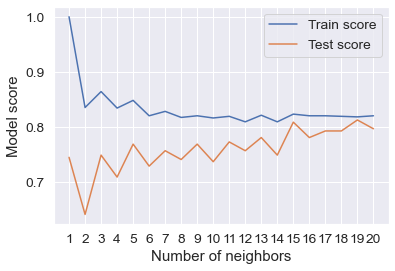

In [413]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 15` seems best.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [414]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [415]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [416]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [417]:
rs_log_reg.score(X_test, y_test)

0.796812749003984

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [418]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


In [419]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [420]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8286852589641435

### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:
* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [421]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [422]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [423]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.796812749003984

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

Now Here as `RandomForestClassifier()` model has the highest accuracy, we will choose that model as our final model.

In [424]:
model = rs_rf;

## Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [425]:
# Make preidctions on test data
y_preds = model.predict(X_test)

In [426]:
y_preds

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [427]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`plot_roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) function we can see it takes `(estimator, X, y)` as inputs. Where `estiamator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

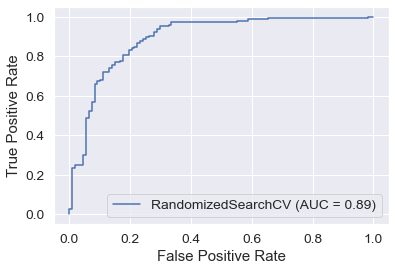

In [428]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(model, X_test, y_test);

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

In [429]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 81  26]
 [ 17 127]]


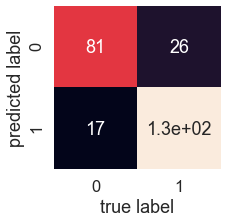

In [430]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [431]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       107
           1       0.83      0.88      0.86       144

    accuracy                           0.83       251
   macro avg       0.83      0.82      0.82       251
weighted avg       0.83      0.83      0.83       251



## Save and Load Mental Health Treatment Recommendation Model

In [432]:
# Save Model Using Pickle
import pickle

filepath = "../models/treatment_recommendation_model.pkl"

pickle.dump(model, open(filepath, 'wb'))

In [433]:
# Load saved model and predict
loaded_model = pickle.load(open(filepath, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8286852589641435


## Feature Value Map

In [434]:
feat_val_dict = {}

for column in X.columns:
    if(column=='Age'):
        continue
        
    feat_val_dict[column] = original_df[column].unique().tolist()

In [435]:
feat_val_dict

{'Gender': ['female', 'male', 'trans'],
 'self_employed': ['No', 'Yes'],
 'family_history': ['No', 'Yes'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'phys_health_consequence': ['No', 'Yes', 'Maybe'],
 'coworkers': ['Some of them', 'No', 'Yes'],
 'supervisor': ['Yes', 'No', 'Some of them'],
 'mental_health_interview': ['No', 'Yes', 'Maybe'],
 'phys_health_interview': ['Maybe', 'No', 'Yes'],
 'mental_vs_physical': ['Yes', "Do

In [436]:
import json
feat_val_file_path = "../data/feat_val_map.json" 
with open(feat_val_file_path, "w") as outfile:
    json.dump(feat_val_dict, outfile)

## Save Scaler and Encoder Mapping To Use In Flask App

In [437]:
# Save Scaler Using Pickle
import pickle

filepath = "../models/scaler.pkl"

pickle.dump(scaler, open(filepath, 'wb'))

# Load saved model and predict
loaded_model = pickle.load(open(filepath, 'rb'))
result = loaded_model.transform([[37]])
result[0][0]

0.4776119402985075

In [438]:
# save mapping of encoder into json file
import json
encoding_map_file_path = "../data/encoding_map.json" 
with open(encoding_map_file_path, "w") as outfile:
    json.dump(encode_dict, outfile)

In [439]:
encode_dict

{'Gender': {'female': 0, 'male': 1, 'trans': 2},
 'self_employed': {'No': 0, 'Yes': 1},
 'family_history': {'No': 0, 'Yes': 1},
 'work_interfere': {"Don't know": 0,
  'Never': 1,
  'Often': 2,
  'Rarely': 3,
  'Sometimes': 4},
 'no_employees': {'1-5': 0,
  '100-500': 1,
  '26-100': 2,
  '500-1000': 3,
  '6-25': 4,
  'More than 1000': 5},
 'remote_work': {'No': 0, 'Yes': 1},
 'tech_company': {'No': 0, 'Yes': 1},
 'benefits': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'care_options': {'No': 0, 'Not sure': 1, 'Yes': 2},
 'wellness_program': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'seek_help': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'anonymity': {"Don't know": 0, 'No': 1, 'Yes': 2},
 'leave': {"Don't know": 0,
  'Somewhat difficult': 1,
  'Somewhat easy': 2,
  'Very difficult': 3,
  'Very easy': 4},
 'mental_health_consequence': {'Maybe': 0, 'No': 1, 'Yes': 2},
 'phys_health_consequence': {'Maybe': 0, 'No': 1, 'Yes': 2},
 'coworkers': {'No': 0, 'Some of them': 1, 'Yes': 2},
 'supervisor': {'No':

In [440]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.
